<a href="https://colab.research.google.com/github/matheusBernal/Detection-Faces/blob/main/DetectionFace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opencv-python opencv-python-headless opencv-contrib-python tensorflow matplotlib

In [2]:
from IPython import get_ipython
from IPython.display import display
import cv2
import tensorflow as tf
from tensorflow import keras
from PIL import Image
import os
import cv2.data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
import numpy as np
import matplotlib.pyplot as plt
import pickle
import zipfile
from google.colab.patches import cv2_imshow

Unzip the data_1.zip

In [27]:
zipRef = zipfile.ZipFile("/content/data_1.zip", 'r')
zipRef.extractall()
zipRef.close()

Use the CascadeClassifer to find face of image from each folder of cast of the big bang theory, and finaly save on 300x300 on folder train_faces

In [4]:
train_dir = '/content/data/train'
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
for name in os.listdir(train_dir):
    path_class = train_dir+'/'+name
    for photo_name in os.listdir(path_class):
        path_name_class = path_class+'/'+photo_name
        image = cv2.imread(path_name_class)
        gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray,scaleFactor=1.2,minNeighbors=4,minSize=(50,50))
        for i,(x,y,w,h) in enumerate(faces):
            Y = y+h
            X = x+w
            face = image[y:Y,x:X]
            face_resized = cv2.resize(face,(128,128))
            face_filename = f"/content/data/train_faces/{name}/{photo_name}"
            face_filename_valid = f"/content/data/valid/{name}/{photo_name}"
            cv2.imwrite(face_filename,face_resized)
            cv2.imwrite(face_filename_valid,face_resized)

In [28]:
TRAING_FACES_DIR = '/content/data/train_faces'
VALID_DIR = '/content/data/valid'

training_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

In [29]:
training_generator = training_datagen.flow_from_directory(TRAING_FACES_DIR,target_size=(300, 300),batch_size=30,class_mode='categorical')
validation_generator = validation_datagen.flow_from_directory(VALID_DIR,target_size=(300, 300),batch_size=30,class_mode='categorical')

Found 131 images belonging to 6 classes.
Found 131 images belonging to 6 classes.


In [30]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(300,300,3)),
    tf.keras.layers.Conv2D(256,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(len(training_generator.class_indices),activation='softmax'),
])

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [31]:
history = model.fit(training_generator,validation_data=validation_generator,epochs=30)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 124s 28s/step - accuracy: 0.1185 - loss: 1.8024 - val_accuracy: 0.1679 - val_loss: 1.7918
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 138s 24s/step - accuracy: 0.1479 - loss: 1.7967 - val_accuracy: 0.1679 - val_loss: 1.7914
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 120s 28s/step - accuracy: 0.1646 - loss: 1.7920 - val_accuracy: 0.1679 - val_loss: 1.7908
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 138s 23s/step - accuracy: 0.1380 - loss: 1.7917 - val_accuracy: 0.1679 - val_loss: 1.7900
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 115s 23s/step - accuracy: 0.1546 - loss: 1.7923 - val_accuracy: 0.1756 - val_loss: 1.7900
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 133s 28s/step - accuracy: 0.1772 - loss: 1.7890 - val_accuracy: 0.1679 - val_loss: 1.7877
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 116s 24s/step - accuracy: 0.1842 - loss: 1.7880 - val_accuracy: 0.2061 - val_loss: 1.7836
Epoch 8/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 122s 28s/step - accuracy: 0.2762 - loss: 1.7809 - val_accuracy: 0.3206 - val_loss: 1.7790
Epo

In [32]:
accuracy = history.history['accuracy']
loss = history.history['loss']
val_accuracy = history.history['val_accuracy']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

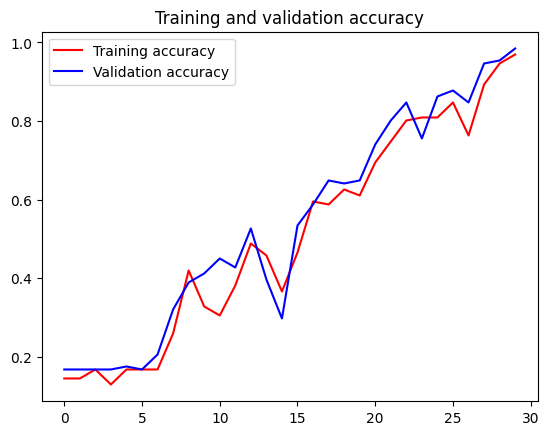

In [33]:
plt.plot(epochs,accuracy,'r',label='Training accuracy')
plt.plot(epochs,val_accuracy,'b',label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

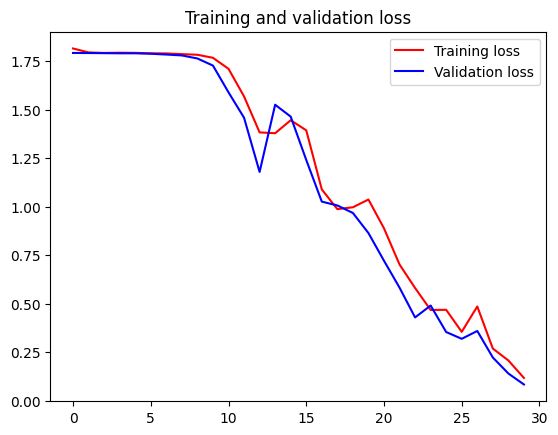

In [34]:
plt.plot(epochs,loss,'r',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [35]:
from keras.preprocessing import image
def classificationImage(i):
    path_image = f"/content/data/test/{i}.jpg"
    image_loaded= image.load_img(path_image,target_size=(300,300))
    img_array = image.img_to_array(image_loaded)
    img_array = np.expand_dims(img_array,axis=0)
    img_array = np.vstack([img_array])
    predict = history.model.predict(img_array,batch_size=10)
    if predict[0][0]!=0:
        return "Amy"
    elif predict[0][1] !=0:
        return 'Bernadete'
    elif predict[0][2] !=0:
        return 'Leonard'
    elif predict[0][3] !=0:
        return 'Penny'
    elif predict[0][4] !=0:
        return 'Raj'
    else:
        return 'Sheldon'

In [36]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
image_cast = cv2.imread('/content/data/test/Cast.jpeg')
gray = cv2.cvtColor(image_cast,cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray,1.8,minNeighbors=4,minSize=(30,30))
for i,(x,y,w,h) in  enumerate(faces):
    #cv2.rectangle(image_cast,(x,y),(x+w,y+h),(255,0,0),2)
    Y = y+h
    X = x+w
    face = image_cast[y:Y,x:X]
    #cv2.imshow('Image cast',face)
    #cv2.waitKey(0)
    #cv2.destroyAllWindows()
    face_resized = cv2.resize(face,(300,300))
    face_filename = f"/content/data/test/{i}.jpg"
    cv2.imwrite(face_filename,face_resized)
    name_classification = classificationImage(i)
    cv2.rectangle(image_cast,(x,y),(x+w,y+h),(255,0,0),2)
    cv2.putText(image_cast,name_classification,(x,y),cv2.FONT_HERSHEY_SIMPLEX,1,(255,0,0),2)
cv2.imwrite('/content/output_image.jpg', image_cast)
#cv2.imshow(image_cast)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 527ms/step


True

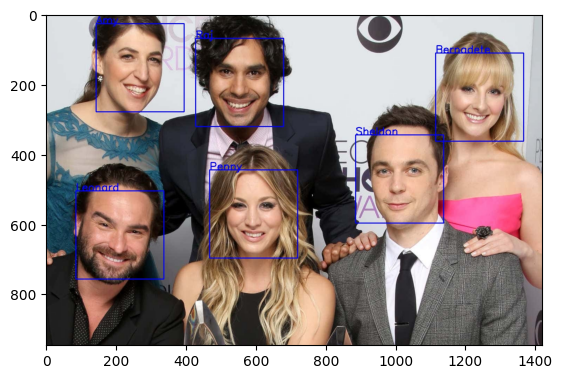

In [37]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('/content/output_image.jpg')
imgplot = plt.imshow(img)
plt.show()